# Imports and Helper functions


In [1]:
# Import libraries
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
plt.style.use('ggplot')

# if you want to change the frozen lake enviornment from stocastic to deterministic
from gym.envs.registration import register
register(
    id = 'FrozenLakeNotSlippery-v0',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4', 'is_slippery': False}
)

In [2]:
# Create enviornment
env = gym.make('FrozenLakeNotSlippery-v0')

In [3]:
# check the states 
state_space = env.observation_space.n

In [4]:
# check action space
action_space = env.action_space.n

In [15]:
# define hyperparameters
num_episode = 1000
gamma = 0.99
learning_rate = 0.9

e_greedy = 0.7
egreedy_final = 0.1
egreedy_dacay = 0.999

egreedy_total = []

In [16]:
steps_total = []
total_reward = []

Q = torch.zeros([state_space, action_space])

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    
    while True:
        step += 1
        
        random_egreedy = torch.rand(1).item()

        if random_egreedy > e_greedy:
            random_values = Q[state] + torch.rand(1, action_space)/1000  # add some randomness to the current Q state value 
            action = torch.max(random_values, 1)[1].item() # get the action from the max value state
        else:
            action = env.action_space.sample()

        if e_greedy > egreedy_final:
            e_greedy *= egreedy_dacay

        new_state, reward, done, info = env.step(action)

        # Update Q table using bellman equation
        Q[state][action] = (1 - learning_rate) * Q[state][action] + \
                        learning_rate * (reward + gamma * torch.max(Q[new_state]))

        state = new_state

        #env.render()
        if done:
            steps_total.append(step)
            total_reward.append(reward)
            egreedy_total.append(e_greedy)
            #print('episode finished after %i steps' %step)
            break

print(Q)

tensor([[0.9415, 0.9510, 0.9321, 0.9415],
        [0.9415, 0.0000, 0.0000, 0.9227],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.9510, 0.9606, 0.0000, 0.9415],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9606, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.9606, 0.0000, 0.9703, 0.9510],
        [0.9606, 0.9801, 0.9606, 0.0000],
        [0.9703, 0.0000, 0.0000, 0.9505],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9801, 0.9900, 0.9703],
        [0.9801, 0.9900, 1.0000, 0.9606],
        [0.0000, 0.0000, 0.0000, 0.0000]])


In [17]:
print('Percent of episodes finished successfully : {0}'.format(sum(total_reward)/num_episode))
print('Percent of episodes finished successfully (last 100 episodes) : {0}'.format(sum(total_reward[-100:])/100))
print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
print('Average number of steps (last 100 episodes): %.2f' % (sum(steps_total[-100:])/100))

Percent of episodes finished successfully : 0.78
Percent of episodes finished successfully (last 100 episodes) : 0.9
Average number of steps: 6.54
Average number of steps (last 100 episodes): 6.44


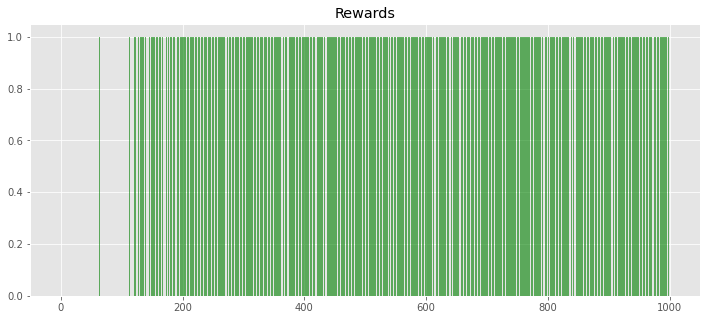

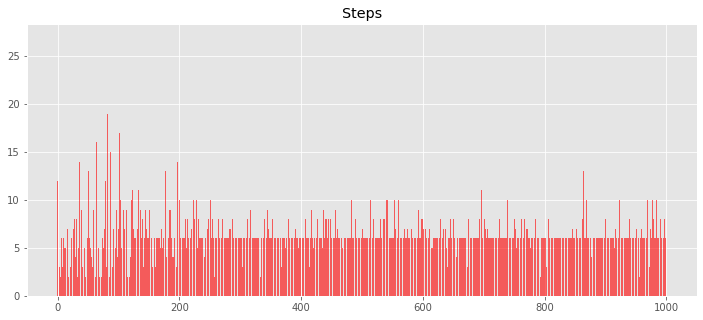

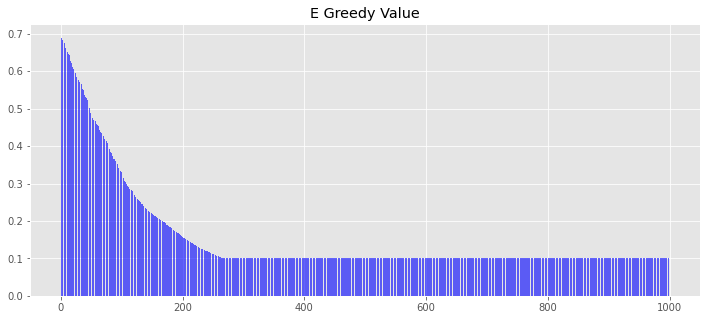

In [18]:
# Plot graphs for rewards and steps
plt.figure(figsize = (12, 5))
plt.title('Rewards')
plt.bar(torch.arange(len(total_reward)), total_reward, alpha = 0.6, color = 'green')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('Steps')
plt.bar(torch.arange(len(steps_total)), steps_total, alpha = 0.6, color = 'red')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('E Greedy Value')
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha = 0.6, color = 'blue')
plt.show()